In [77]:
# Imports

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Increases the resolution of the graphs rendered below by changing image format into vector
%config InlineBackend.figure_formats = ['svg']

## Loading and split preprocessed data

In [78]:
# Importing the cleaned dataset
df = pd.read_csv("/Users/james/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Phase_2/cleaned_data/data_salaries_cleaned.csv")

# Just double checking that the data has been imported correctly
df.head()

,work_year,salary_cleaned,salary_in_usd_cleaned,company_size_lab,salary_currency_encoded,employee_residence_encoded,company_location_encoded,remote_ratio,job_title_encoded,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,2023.0,80000.0,85847.0,0.0,49064728.0,81406157.0,81406157.0,100.0,2058566.0,0,0,0,1,0,0,1,0
1,2023.0,30000.0,30000.0,2.0,51126126.0,25370322.0,25370322.0,100.0,10028239.0,0,0,1,0,1,0,0,0
2,2023.0,25500.0,25500.0,2.0,51126126.0,25370322.0,25370322.0,100.0,10028239.0,0,0,1,0,1,0,0,0
3,2023.0,175000.0,175000.0,1.0,51126126.0,21365473.0,21365473.0,100.0,72608695.0,0,0,0,1,0,0,1,0
4,2023.0,120000.0,120000.0,1.0,51126126.0,21365473.0,21365473.0,100.0,72608695.0,0,0,0,1,0,0,1,0


In [79]:
# Splitting the data using random state 101 with a 70-30 train-test split

from sklearn.model_selection import train_test_split


# Define the target variable column name
target_column = ["salary_in_usd_cleaned"] # Replace 'target_column' with the name of your target column

# Separate the features (X) and the target variable (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Perform the 70-30 train-test split with a random state of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


# Create two separate DataFrames for training and testing
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


# Convert the 'y_test' DataFrame column to a 1D numpy array:
y_test = y_test.values[:, 0]
df_train.head()

,work_year,salary_cleaned,company_size_lab,salary_currency_encoded,employee_residence_encoded,company_location_encoded,remote_ratio,job_title_encoded,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,salary_in_usd_cleaned
342,2023.0,257000.0,1.0,51126126.0,25370322.0,25370322.0,0.0,67921766.0,0,0,0,1,0,0,1,0,257000.0
859,2023.0,172200.0,1.0,51126126.0,25370322.0,25370322.0,0.0,67921766.0,0,0,0,1,0,0,1,0,172200.0
2268,2022.0,135000.0,1.0,51126126.0,25370322.0,25370322.0,0.0,39298127.0,1,0,0,0,0,0,1,0,135000.0
43,2023.0,110680.0,0.0,51126126.0,25370322.0,25370322.0,0.0,94260756.0,1,0,0,0,0,0,1,0,110680.0
1826,2022.0,150000.0,1.0,51126126.0,25370322.0,25370322.0,0.0,72608695.0,0,0,0,1,0,0,1,0,150000.0


In [80]:
# Verify the shapes of the DataFrames
print("Original DataFrame shape:", df.shape)
print("Training DataFrame shape:", df_train.shape)
print("Testing DataFrame shape:", df_test.shape)

# Verify the proportions of the train-test split
total_samples = df.shape[0]
train_samples = df_train.shape[0]
test_samples = df_test.shape[0]

train_proportion = train_samples / total_samples
test_proportion = test_samples / total_samples

print("Proportion of training samples:", train_proportion)
print("Proportion of testing samples:", test_proportion)


Original DataFrame shape: (3755, 17)
Training DataFrame shape: (2628, 17)
Testing DataFrame shape: (1127, 17)
Proportion of training samples: 0.699866844207723
Proportion of testing samples: 0.30013315579227695


In [81]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_regression = LinearRegression()

# Train the model on the training data
linear_regression.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = linear_regression.predict(X_train)

# Calculate the training accuracy (Note: This doesn't apply to regression)
# In regression, we typically use evaluation metrics like Mean Squared Error (MSE) or R-squared
# But for the sake of consistency with the existing code structure, we can use R-squared here
acc_linear_regression_train = round(linear_regression.score(X_train, y_train) * 100, 2)

# Print the training R-squared
print("Training R-squared:", acc_linear_regression_train)


Training R-squared: 89.44


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a Random Forest Regressor with 100 estimators
random_forest_regression = RandomForestRegressor(n_estimators=100, random_state=101)

# Train the model on the training data
random_forest_regression.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train_rf = random_forest_regression.predict(X_train)

# Calculate the training R-squared
r2_random_forest_train = r2_score(y_train, y_pred_train_rf)

# Print the training R-squared
print("Training R-squared:", r2_random_forest_train)


/var/folders/k5/k1_9f5wd21sb8jb25qj3ldth0000gn/T/ipykernel_72838/3430471592.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_regression.fit(X_train, y_train)


Training R-squared: 0.9965613687817895


/var/folders/k5/k1_9f5wd21sb8jb25qj3ldth0000gn/T/ipykernel_72838/1652673824.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(y_test, y_pred, alpha=0.5, cmap='viridis', edgecolors='w', linewidth=0.5, label="Predictions")


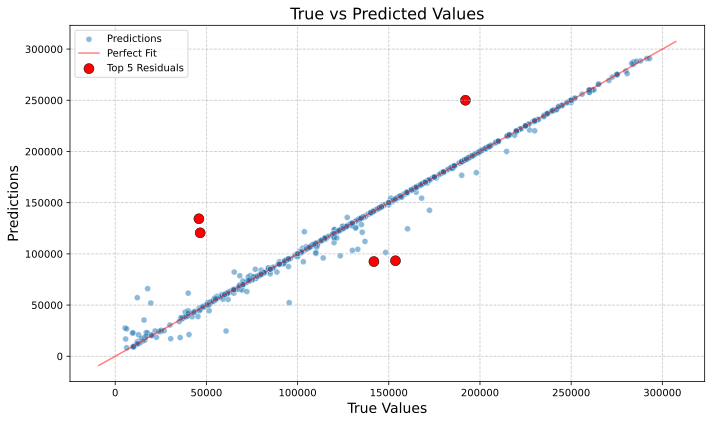

In [87]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for all points
ax.scatter(y_test, y_pred, alpha=0.5, cmap='viridis', edgecolors='w', linewidth=0.5, label="Predictions")

# Diagonal line for perfect predictions
limits = [min(ax.get_xlim() + ax.get_ylim()), max(ax.get_xlim() + ax.get_ylim())]
ax.plot(limits, limits, color='red', alpha=0.5, label="Perfect Fit")

# Highlight specific points (example: points with the largest residuals)
residuals = y_test - y_pred
top_errors_idx = np.argsort(np.abs(residuals))[-5:]  # Example: get indices of the top 5 errors
ax.scatter(y_test[top_errors_idx], y_pred[top_errors_idx], color='red', s=100, edgecolors='black', linewidth=0.5, label="Top 5 Residuals")

# Grid
ax.grid(True, linestyle='--', alpha=0.7)

# Titles and labels
ax.set_title("True vs Predicted Values", fontsize=16)
ax.set_xlabel("True Values", fontsize=14)
ax.set_ylabel("Predictions", fontsize=14)

# Displaying the legend
ax.legend(loc='best')

plt.tight_layout()
plt.show()

## Evaluation

In [85]:
from sklearn.metrics import r2_score

# Assuming you have trained your regression model and obtained y_pred and y_test
y_pred = linear_regression.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


R-squared: 0.8796142055581772


In [86]:
# Assuming you have trained your regression model and obtained y_pred and y_test
y_pred = random_forest_regression.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.9881390861029749


## Summary


Summary of Model Training and Evaluation

Steps Taken to Train and Evaluate Models:

Data Preprocessing: Loaded and inspected the dataset. Subsequently, a 70-30 train-test split was executed to segregate the data into training and testing sets.
Model Training:
Linear Regression: A linear regression model was trained to predict the target column "salary_in_usd_cleaned".
Random Forest Regression: A random forest regressor with 100 trees was trained on the data.
Support Vector Regression (SVR): An SVR model was additionally trained to predict the target, using the RBF kernel.
Visualization: A scatter plot was used to compare true vs. predicted values, and red dots highlighted the top 5 residuals/errors.
Evaluation: The R-squared metric was calculated to gauge the performance of each regression model on test data.
